# ML Models | Final Project
## Name: Kevin Veeder
## Date: June, 2024

## Overview

What factors can effectively contribute to a student's academic grade? Is it simply a matter of time spent studying or is there more that is involved with it? Does a students upbringing play a role? How do they choose to spend their time outside of the classroom? These are the questions that we are setting out to solve. 

In figuring out the answers to these questions, we could help student's achieve higher academic success and assist them to better achieve their goals.

## Problem Framing & Big Picture

### Business Problem

The Avising Team has been tasked with analyzing student data for the Portugese school system. We will attempt to create a machine learning model to predict students' performance based on certain relavent features. Our model will then be used to identify certain individuals who might need additional support to improve their grade in the course. 

### Framing the Problem

Since we will be trying to predict the student's final grade, we will use build a model that utilizes supervised learning. In this type of learning, we will input our features, as well as respective labels into our algorithm, and the machine learning system will attempt to make a prediction based on that training data (i.e., the data that we will use to train our model.) Also, since our data won't be continuously updating, we will be training our data by way of batch learning, or also known as offline learning. This means that we will use all of the available data to train our model, learning all at one time. If we would want to update our data, then we would have to update the model and run it again. 

### Machine Learning Task

For this model, we are choosing to run a regression task to predict the numeric final G3 grades. In regression tasks, we are trying to predict a continuous quantity, where as opposed to classification tasks where we would be trying to predict a discrete class label (e.g., if a student were to pass or fail.) By choosing regression, we are attempting to get a better understanding of the exact grade that the student would reach, giving us a better understanding of their knowledge in the course. Our thinking is that if we chose to do a classification task, we would just be predicting if they were to pass or fail, as opposed to if they got an A, B, C, and so on like we will see in our prediction using regression.

### Metrics for Model's Performance

We will measuring the model's performance using cross-validation. Cross-validation helps us to hold out part of our data as a test set, and then after we have trained our model on our training data, we will test our model with the testing data, allowing us to see how well our model will do with predicting new instances. We will test the accuracy of our model using SciKit Learns built in `cross_val_score()` function with our estimator. 

We will use this to see our root mean squared error (RMSE), which is the difference between our predicted value and the actual values, and we will calculate the R-squared value which tells us the percent of variance that is explained by our models variables or features. 

## Common Imports

This project requires Python 3.7 or above

In [1]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

It also uses some other common imports such as NumPy and Pandas

In [3]:
import pandas as pd
import numpy as np

## Get the Data

### Importing the data

The data we will be using is downloaded from UC Invines machine learning repository.

In [4]:
# import the 'student-mat.csv' file
student_mat = pd.read_csv('student-mat.csv')

### Checking the size and type of the data

In [5]:
# checking the size
student_mat.shape

(395, 35)

The data has 395 rows, or instances, and 35 columns, or variables

In [6]:
# checking the data types of our columns
student_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

In [7]:
# taking a look at the first 5 rows of our data
student_mat.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,1.0,1.0,4.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,3,1,1,3,NaN,NaN,NaN,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,2,2,3,3,1.0,1.0,8.0,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,2,1,1,5,0.0,0.0,2.0,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,2,1,2,5,0.0,0.0,4.0,6,10,10


By looking at our data, we can see that there are some missing values present in the `absences_G1`, `absences_G2`, and `absences_G3` columns. We will have to deal with these later.

### Available features

The available features, or attributes, of our data as well as their descriptions are as follows:

- `school`: student's school ("GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
- `sex`: student's sex ("F" - female or "M" - male)
- `age`: student's age (numeric from 15 to 22)
- `address`: student's home address type ("U" - urban or "R" - rural)
- `famsize`: family size ("LE3" - less or equal to 3 or "GT3" - greater than 3)
- `Pstatus`: parent's cohabitation status ("T" - living together or "A" - apart)
- `Medu`: mother's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- `Fedu`: father's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- `Mjob`: mother's job ( "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- `Fjob`: father's job ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- `reason`: reason to choose this school (close to "home", school "reputation", "course" preference or "other")
- `guardian`: student's guardian ("mother", "father" or "other")
- `traveltime`: home to school travel time (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- `studytime`: weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- `failures`: number of past class failures (n if 1<=n<3, else 4)
- `schoolsup`: extra educational support (yes or no)
- `famsup`: family educational support (yes or no)
- `paid`: extra paid classes within the course subject (Math or Portuguese) (yes or no)
- `activities`: extra-curricular activities (yes or no)
- `nursery`: attended nursery school (yes or no)
- `higher`: wants to take higher education (yes or no)
- `internet`: Internet access at home (yes or no)
- `romantic`: with a romantic relationship (yes or no)
- `famrel`: quality of family relationships (from 1 - very bad to 5 - excellent)
- `freetime`: free time after school (from 1 - very low to 5 - very high)
- `goout`: going out with friends (from 1 - very low to 5 - very high)
- `Dalc`: workday alcohol consumption (from 1 - very low to 5 - very high)
- `Walc`: weekend alcohol consumption (from 1 - very low to 5 - very high)
- `health`: current health status (from 1 - very bad to 5 - very good)
- `absences_G1`: number of school absences for G1 term (numeric)
- `absences_G2`: number of school absences for G2 term (numeric)
- `absences_G3`: number of school absences for G3 term (numeric)
- `G1`: first term grade (numeric: from 0 to 20)
- `G2`: second term grade (numeric: from 0 to 20)
- `G3`: final grade (numeric: from 0 to 20)

### Target Attribute

The target for our regression task (i.e., the variable we are trying to predict) is the `G3` numeric final grade.

### Splitting Our Data

Before we go any further, we should split the data into our training and our test sets. We will use sklearns `train_test_split()` function to partition our data into a training set and a test set by employing our features and target variables. We will allocate 80% of the instances for training and 20% for testing, and we will use a random state of 42 for reproducibility of our results. 

In [8]:
# First, import sklearns 'train_test_split' function that we will use to split our data
from sklearn.model_selection import train_test_split

# save the G3 column as a series named 'y' (this is our target)
y = student_mat['G3']

# save the remaining columns, without our target, as X (these are our features)
X = student_mat.drop('G3', axis=1)

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Explore the Data

### Studying the training set attributes and characteristics

We will begin to explore our training data by looking at the descriptive statistics for our numerical columns.

In [9]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,305.0,16.747541,1.274188,15.0,16.0,17.0,18.0,22.0
Medu,316.0,2.734177,1.080375,0.0,2.0,3.0,4.0,4.0
Fedu,316.0,2.544304,1.078476,0.0,2.0,3.0,3.0,4.0
traveltime,316.0,1.430380,0.688842,1.0,1.0,1.0,2.0,4.0
studytime,316.0,2.047468,0.836258,1.0,1.0,2.0,2.0,4.0
failures,316.0,0.335443,0.735588,0.0,0.0,0.0,0.0,3.0
famrel,316.0,3.943038,0.885464,1.0,4.0,4.0,5.0,5.0
freetime,316.0,3.218354,1.020323,1.0,3.0,3.0,4.0,5.0
goout,316.0,3.161392,1.119480,1.0,2.0,3.0,4.0,5.0
Dalc,316.0,1.500000,0.903257,1.0,1.0,1.0,2.0,5.0


First thing that stands out is that the max value for the third term absenses is abnormally high at 51. This column also has a much higher mean and standard deviation than the other term absences columns. This could be caused by a potential outlier that could cause issues for our model. We will have to look at this in more depth later on. 

Another thing to notice, is that the mean's for G1 and G2 are both around 11, which implies that some students must have performed really badly to bring the average down so much. We can see that the best scores were 19 for both G1 and G2, which is an A+ on the grading system, but the worst scores were 5 and 0 for those respective terms, which are both failing grades. 

The average age for our students is about 17 years old, while the range is from 15-22 years old. 

To analyze some of our categorical features, we can inspect the distribution of values by examining their respective value counts percentages.

In [10]:
# looking at value counts for school variable
X_train['school'].value_counts(normalize=True)

school
GP    0.892405
MS    0.107595
Name: proportion, dtype: float64

Most of the students in our training set belong to Gabriel Pereira's school (about 89%), while only about 11% of the instances are in Mousinho da Silveira's school. 

In [11]:
# looking at the students genders
X_train['sex'].value_counts(normalize=True)

sex
F    0.537975
M    0.462025
Name: proportion, dtype: float64

About 54% of our students are female, and about 46% of our students are males.

In [12]:
X_train['famsize'].value_counts(normalize=True)

famsize
GT3    0.71519
LE3    0.28481
Name: proportion, dtype: float64

We can see from the family size variable that 72% of the students have greater than 3 people in their family, while about 28% of them have families with 3 or less people. 

### Visualizations of Training Data

It's always a good idea to see some graphs and different views of our data to explore relationships between them and to see where we should focus our interest.

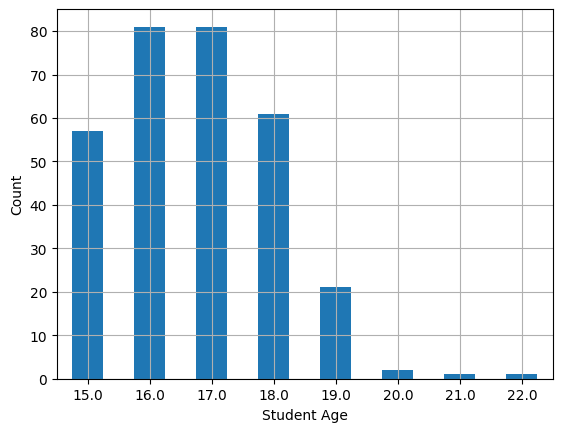

In [13]:
# import matplotlib for visuals
import matplotlib.pyplot as plt

X_train['age'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Student Age")
plt.ylabel("Count")
plt.show()

In the plot above, we are visualizing the different ages of the students and how many of each age their are. As we can see, the bar chart is right skewed with most of the students being around 15-18 years old and there is not nearly as many older students.

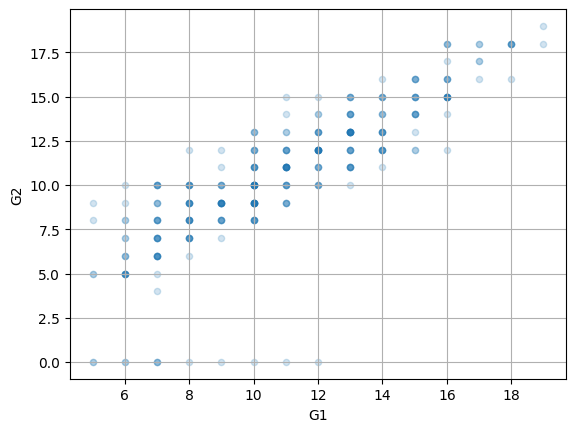

In [14]:
X_train.plot(kind='scatter', x='G1', y='G2', grid=True, alpha=0.2)
plt.show()

In the scatter plot above, we plotted their first term grade by their second term grade and generally saw a linear trend. The students who performed badly in the first term, also performed badly in the second term, and the students who got higher scores in the first term also got higher scores in the second term. There are also some students who received a 0 for the second term, but none of them received higher than a C in the first term, so this makes sense. 

The darker the dot shows a higher distribution of scores, so we can see that most of the students performed somewhere around the middle. 

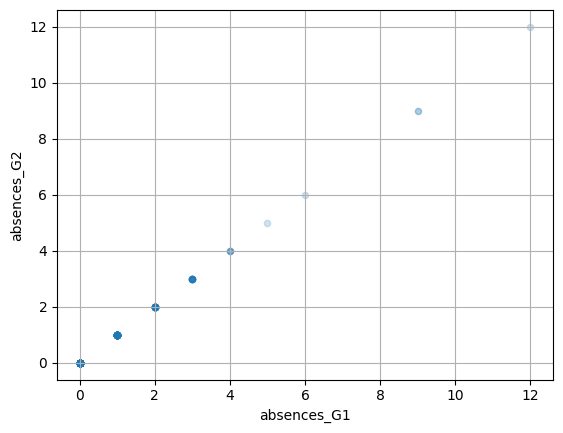

In [15]:
X_train.plot(kind='scatter', x='absences_G1', y='absences_G2', grid=True, alpha=0.2)
plt.show()

In the scatterplot above, we plotted the first term absences by the second term absences and also saw a linear trend. Students who had a lot of absences for the first term, were also absent a lot in the second term. The darker dots indicate that most of the students had 4 or less absences per term, but we can see that there are some outliers who had 9 and 12 absences per term. 

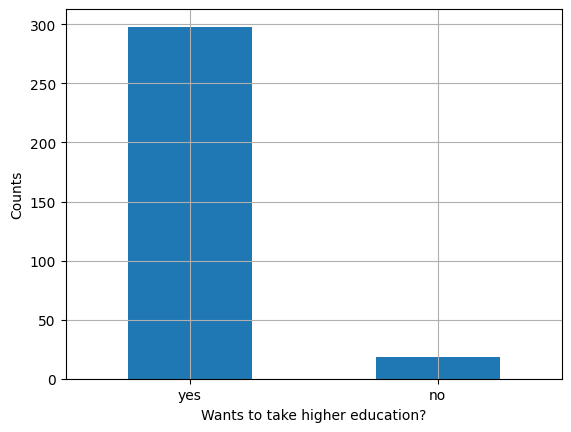

In [16]:
X_train['higher'].value_counts().plot.bar(rot=0, grid=True)
plt.xlabel('Wants to take higher education?')
plt.ylabel('Counts')
plt.show()

As we can clearly see in the graph above, an overwhelming majority of the students want to pursue higher education. This is why our model is so important! We want to be able to identify which students are struggling in their education so that we can help them get to the point where they can suceed at higher levels. Without mastering their courses at this level, they won't be able to pursue a higher education at all. 

### Correlations Between Attributes

Now we will look at the correlation coeficient between attributes

In [17]:
# select only our numeric columns
num_cols = X_train.select_dtypes([np.number]).columns
num_cols

# create new combined DataFrame that includes our target variable
combined_df = pd.concat([X_train[num_cols], y_train], axis=1)

# check correlations between our attributes
corr_matrix = combined_df.corr()
corr_matrix["G3"].sort_values(ascending=False)

G3             1.000000
G2             0.907924
G1             0.791559
Medu           0.215968
studytime      0.138200
Fedu           0.135265
absences_G3    0.092245
famrel         0.069409
absences_G1    0.036652
absences_G2    0.036652
freetime      -0.015244
Walc          -0.057363
Dalc          -0.064698
health        -0.068857
goout         -0.106024
traveltime    -0.106752
age           -0.134519
failures      -0.373769
Name: G3, dtype: float64

We can see that G1 and G2 are highly correlated to our target variable, G3. This makes sense because their final grade is made of of their grades from the other term. We will do well for our model if we could predict G3 without using these columns to predict it. 

Medu and studytime are also correlated but not as much. It makes sense that the amount of time spent studying would be correlated to the final grade. Medu is the mothers level of education, and this also makes sense for its correlation coeficient. If a mother had a high education level, then they could help their child with homework or explaining concepts. 

Also, we will notice that failures has a high negative correlation. This also makes sense. If a student has a previous failures in classes, they might also fail more classes in the future.

Next, we will be visualizing these correlations with a scatter matrix. Since there are so many attributes, we will just pick a couple with either high positive correlations or high negative correlations.

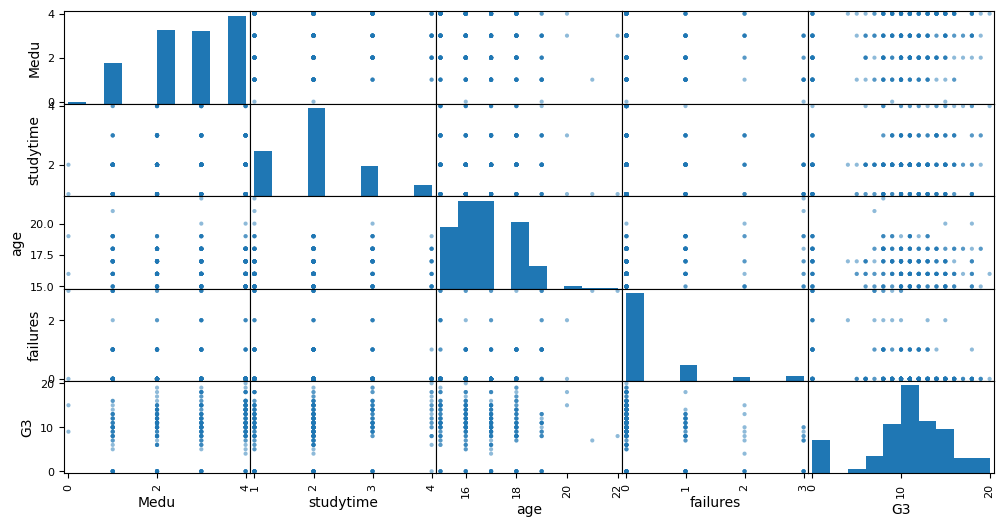

In [18]:
# plot select numeric values
from pandas.plotting import scatter_matrix

# select only a few numeric attributes from the training data
num_cols2 = ['Medu', 'studytime', 'age', 'failures']

# combine training features and target into DataFrame
combined_df2 = pd.concat([X_train[num_cols2], y_train], axis=1)

# plots scatterplots and histograms when variable is compared against itself
scatter_matrix(combined_df2, figsize=(12, 6))
plt.show()

This is another way to see the correlations between our target final grade variable and our positively and negatively correlated attributes. We have left off the G2 and G1 variables since we will be building a model later on that has the option to not include these features. 

## Prepare the Data

### Feature Selection

After exploring the data, we now want to perform feature selection to narrow down our features. We will create a custom transformer called `SelectFeatures()` to handle this so that we can easily transform our test data later. 

The columns that we chose to remove were ones based on the above analysis explorations and correlations between variables. These were the columns that we saw as having little impact on the prediction of our final grade. A few of columns removed from our feature selection criteria include address, reason, nursery, guardian, and a few more as you will see below. 

In [19]:
# import BaseEstimator, and TransformerMixin
from sklearn.base import BaseEstimator, TransformerMixin

class SelectFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self._features = features
 
    def fit(self, X, y=None):
        return self 

    def transform(self, X, y=None):
        return X[self._features]

We will also make another custom transformer that creates a new column in the data that sums the `absences_G1`, `absences_G2`, and `absences_G3` data, and then drops those three columns. This will also have a parameter that when equal to true, drops the `G1` and `G2` columns and when false, leaves the columns in the data

In [20]:
# manually set these column indices
absences_G1_ix, absences_G2_ix, absences_G3_ix = 3, 4, 5
G1_ix, G2_ix = 6, 7

class CombinedAttributes(BaseEstimator, TransformerMixin):
    def __init__(self, drop_terms=True):
        self.drop_terms = drop_terms
        
    def fit(self, X, y=None): 
        return self
    
    def transform(self, X):
        # sums absences columns
        sum_absences = X[:, absences_G1_ix] + X[:, absences_G2_ix] + X[:, absences_G3_ix]
        # drops absences columns when default is true
        if self.drop_terms:
            return np.c_[np.delete(X, [absences_G1_ix, absences_G2_ix, absences_G3_ix, G1_ix, G2_ix], axis=1), sum_absences]
        else:
            return np.c_[np.delete(X, [absences_G1_ix, absences_G2_ix, absences_G3_ix], axis=1), sum_absences]

### Fill in missing values 

We will be using a SimpleImputer to handle the missing values of our numeric data. This will take all of the missing values and replace them with the average value of that variable. We will put this in our numeric pipeline.

### Feature Scaling

Also for our numeric data, we will perform feature scaling to ensure our features are on the same scales. This will also take place within our numeric pipeline. 

### Pipelines

We will create a data pipeline to handle our data preparation steps for our numerical data first. These will consist of imputing the missing values, performing feature selection with our custom transformer and scaling the data. 

In [21]:
# import Pipeline, SimpleImputer, and StandardScalar
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# create a pipeline for only the numeric data
num_pipeline = make_pipeline(
    SimpleImputer(strategy="mean"),
    # because combined attributes parameter is set to true, it will drop the G1 and G2 columns
    CombinedAttributes(drop_terms=True),
    StandardScaler())

Next, we will create a pipeline to handle the categorical data preparation steps. This will include filling any missing values with the most frequent in each column, then a one hot encoder class. We will also have an OrdinalEncoder to encode the variables where order matters in our values, but we will put that directly in the column transformer as opposed to making it in a pipeline.

In [22]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# create pipeline to handle categorical data
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(drop="first", sparse_output=False))

### Column Transformer

Next, we will create a Column Transformer to pass our numeric data to the num_pipeline and our categorical data to the cat_pipeline. As we mentioned before, we have also included an ordinal encoder to encode the variables where the data types are ordinal. 

We can see that the columns that we chose to keep in our features include a list of numerical features, a list of categorical features and some ordinal features that are going to be ran through the numeric pipeline, the categorical pipeline and the ordinal encoder respectively to properly process our data.

In [23]:
# import column transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

# create a list of numerical column names and categorical column names
num_attr = ['age', 'studytime', 'failures', 'absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2']
cat_attr = ['school', 'sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
ord_attr = ['Medu', 'Fedu']

# create full pipeline
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attr),
    ("cat", cat_pipeline, cat_attr),
    ("ord", OrdinalEncoder(), ord_attr)
])

# invoke fit_transform on the X_train dataset to generate preprocessed data
X_train_prepared = preprocessing.fit_transform(X_train)

In [24]:
X_train_prepared.shape

(316, 26)

Now we have transformed our training data, and since our custom transformer's parameter for 'drop_terms=True', we have correctly dropped the G1/G2 columns. Below, we will run our training data through the same process but we will make 'drop_terms=False' and display the shape so that you can see the difference in the number of features.

In [25]:
# create a pipeline for only the numeric data
num_pipeline2 = make_pipeline(
    SimpleImputer(strategy="mean"),
    # drop_terms=False below, which will keep the G1 and G2 columns present in our model
    CombinedAttributes(drop_terms=False),
    StandardScaler())

# create full pipeline with new num_pipeline2
preprocessing2 = ColumnTransformer([
    ("num", num_pipeline2, num_attr),
    ("cat", cat_pipeline, cat_attr),
    ("ord", OrdinalEncoder(), ord_attr)
])

# invoke fit_transform on the X_train dataset to generate preprocessed data
X_train_prepared_G1_G2 = preprocessing2.fit_transform(X_train)

In [26]:
X_train_prepared_G1_G2.shape

(316, 28)

As you can see, our new X_train_prepared_G1_G2 does keep the G1 and G2 columns if we have our custom transformers drop_terms parameter equal to false. You can see that the shape of X_train_prepared had 28 columns, but our X_train_prepared_G1_G2 has 28. This way we can train our model either using these variables or without these variables. 

## Shortlist Promising Models

### Fit Models

Now we will begin to fit our models. We will train 3 models: Linear Regression model, Random Forest Regressor model, and a Ridge Regression model. We will also fit our models both with and without the G1 and G2 columns for comparison.

We will begin by fitting three models that do not include our G1 and G2 columns.

In [27]:
# Import our regressors
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

# option 1 - using prepared data without G1 and G2 columns

# LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

In [28]:
# RandomForestRegressor()
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_prepared, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# create instance of Ridge
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train_prepared, y_train)

Ridge(random_state=42)

Now we will fit our models using the X_train_prepared_G1_G2 data, which has G1 and G2 columns still present

In [30]:
# option 2 - using prepared data with G1 and G2 columns

# LinearRegression
lin_reg_Gs = LinearRegression()
lin_reg_Gs.fit(X_train_prepared_G1_G2, y_train)

LinearRegression()

In [31]:
# RandomForestRegressor()
forest_reg_Gs = RandomForestRegressor(random_state=42)
forest_reg_Gs.fit(X_train_prepared_G1_G2, y_train)

RandomForestRegressor(random_state=42)

In [32]:
# Ridge
ridge_model_Gs = Ridge(random_state=42)
ridge_model_Gs.fit(X_train_prepared_G1_G2, y_train)

Ridge(random_state=42)

### Compare our models with cross validation

Now we will compare the metrics of our models using 4 fold cross validation with the help of the cross_val_score function. This will be used to evaluate the score of the models.

In [33]:
from sklearn.model_selection import cross_val_score

lin_reg_rmses = -cross_val_score(lin_reg, X_train_prepared, y_train,
                                scoring="neg_root_mean_squared_error", cv=4)
pd.Series(lin_reg_rmses).describe()

count    4.000000
mean     4.501806
std      0.208596
min      4.203924
25%      4.434197
50%      4.576435
75%      4.644044
max      4.650430
dtype: float64

In [34]:
forest_reg_rmses = -cross_val_score(forest_reg, X_train_prepared, y_train,
                                scoring="neg_root_mean_squared_error", cv=4)
pd.Series(forest_reg_rmses).describe()

count    4.000000
mean     3.860611
std      0.166826
min      3.733839
25%      3.736218
50%      3.810413
75%      3.934806
max      4.087780
dtype: float64

In [35]:
ridge_model_rmses = -cross_val_score(ridge_model, X_train_prepared, y_train,
                                scoring="neg_root_mean_squared_error", cv=4)
pd.Series(ridge_model_rmses).describe()

count    4.000000
mean     4.475076
std      0.193752
min      4.191385
25%      4.430487
50%      4.553659
75%      4.598248
max      4.601603
dtype: float64

As we can see for the mean values in the three models above, the random forest model seems to be doing the best job so far fitting our data since it has the lowest root mean squared error of the three. We will now check the Root Mean Squared Error's for the trained data that includes the G1 and G2 columns. 

In [36]:
lin_reg_Gs_rmses = -cross_val_score(lin_reg_Gs, X_train_prepared_G1_G2, y_train,
                                scoring="neg_root_mean_squared_error", cv=4)
pd.Series(lin_reg_Gs_rmses).describe()

count    4.000000
mean     1.947074
std      0.060070
min      1.874813
25%      1.909040
50%      1.957634
75%      1.995667
max      1.998215
dtype: float64

In [37]:
forest_reg_Gs_rmses = -cross_val_score(forest_reg_Gs, X_train_prepared_G1_G2, y_train,
                                scoring="neg_root_mean_squared_error", cv=4)
pd.Series(forest_reg_Gs_rmses).describe()

count    4.000000
mean     1.469596
std      0.141987
min      1.294813
25%      1.404543
50%      1.473645
75%      1.538698
max      1.636280
dtype: float64

In [38]:
ridge_model_Gs_rmses = -cross_val_score(ridge_model_Gs, X_train_prepared_G1_G2, y_train,
                                scoring="neg_root_mean_squared_error", cv=4)
pd.Series(ridge_model_Gs_rmses).describe()

count    4.000000
mean     1.935735
std      0.059972
min      1.860607
25%      1.900873
50%      1.947445
75%      1.982306
max      1.987442
dtype: float64

Right away we can see that the models each did a better job predicting our data when the G1 and G2 columns were present. This makes sense because final grade was highly correlated to the first term and second term grades. 

Again, even with the G1 and G2 columns present, we still have the best model using our random forest regression. This will most likely be the model that we will choose for our final model, but before we do that, let's see if we can improve some of our other models using grid search to fine tune our hyperparameters.

## Fine-Tune the System

### Grid Search

Now lets see if we can fine tune our parameters for our ridge model using grid search. This might help improve our ridge model.

We will use the grid search to find the best alpha value to use for our ridge model. This alpha represents the amount of penalty added to the least squares method.

In [39]:
from sklearn.model_selection import GridSearchCV

# first, create a dictionary of values for alpha
ridge_param_grid = {'alpha': [0.25, 0.50, 0.75, 1, 2, 3, 5, 10, 100]}

# instantiate GridSearchCV()
grid_search_cv_ridge = GridSearchCV(ridge_model,
                              ridge_param_grid, verbose=1, cv=10)

# fit the grid search with X_train_prepared and y_train. This is the data without the G1 and G2 columns
grid_search_cv_ridge.fit(X_train_prepared, y_train)

# saves the best model as ridge_model
ridge_model = grid_search_cv_ridge.best_estimator_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [40]:
ridge_model_rmses = -cross_val_score(ridge_model, X_train_prepared, y_train,
                                scoring="neg_root_mean_squared_error", cv=10)
pd.Series(ridge_model_rmses).describe()

count    10.000000
mean      4.198781
std       0.429667
min       3.373227
25%       3.915353
50%       4.267627
75%       4.417898
max       4.795743
dtype: float64

We can see that we did improve our rmse for our ridge model but its still not as good as our random forest regression. 

### Transform Testing Data

Now we will see how well our model actually does, but first we need to transform our testing data to be able to use to measure the performance on the test set.

In [41]:
# this is our transformed testing data without G1 and G2 columns
X_test_prepared = preprocessing.transform(X_test)

# this is our transformed testing data with G1 and G2 columns
X_test_prepared_G1_G2 = preprocessing2.transform(X_test)

### Final Model

Our best model was with the random forest regressor so that is what we will be using for our final model.

Let's generate our final predictions in order to see how well our final model will actually do when trying to predict the final grade.

In [42]:
# Here is the final predictions without using G1 and G2
final_predictions = forest_reg.predict(X_test_prepared)

# Here is the final predictions with the G1 and G2 columns
final_predictions_G1_G2 = forest_reg_Gs.predict(X_test_prepared_G1_G2)

### Final Model Performance

Now we can calculate the final root mean squared error and the final R-Squared value for our testing data using these final predictions and our y_test which is our actual grades.

In [43]:
# import mean_squared_error
from sklearn.metrics import mean_squared_error

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)

C:\Users\kevve\anaconda3\envs\myEnv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
# import r2_score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, final_predictions)

In [45]:
# final rmse with G1 and G2_columns
final_rmse_G1_G2 = mean_squared_error(y_test, final_predictions_G1_G2, squared=False)

C:\Users\kevve\anaconda3\envs\myEnv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [46]:
r2_G1_G2 = r2_score(y_test, final_predictions_G1_G2)

In [47]:
print("Final Performance without G1 and G2 columns:")
print(f"RMSE (Random Forest): {final_rmse}")
print(f"R-squared (Random Forest): {r2}")
print("----------")
print("Final Performance with G1 and G2 columns:")
print(f"RMSE (Random Forest): {final_rmse_G1_G2}")
print(f"R-squared (Random Forest): {r2_G1_G2}")

Final Performance without G1 and G2 columns:
RMSE (Random Forest): 3.8984794179464255
R-squared (Random Forest): 0.2588097177507579
----------
Final Performance with G1 and G2 columns:
RMSE (Random Forest): 1.816043132259762
R-squared (Random Forest): 0.8391609336417342


### Analyzation of Results

As we can see with the final performance numbers above, our model did significantly better predicting students' final grades when the first term and the second terms grade variables were present in our data. 

When the first and second term grade columns were not present in our data, our root mean squared error value tells us that the average difference in the predicted final grades from the actual final grades was 3.89 points. The R-squared value here tells us that our predictor variables didn't do a very good job at all of fitting our model. In other words, only 26% of the variance of our final grade could be explained by our features. 

On the other hand, when we do have the first term and second term grades present, our model does a much better time predicting a students final grade. We can see from the root mean squared error variable that the average difference between the predicted final grade and the actual final grades was 1.81 points. Additionally, the R-squared value here tells us that our features did a pretty good job at fitting our model since about 84% of the variance in our final grade variable could be explained by the attributes that we chose to stay in our model. 

### Conclusion

Initially, we were asked to make a model that we could use to accurately predict a students final grade based on other relevant features. In the end, we did just that. We have analyzed a few different approaches that we could take in moving forward with our results. If asked what the overall best prediction we could make would be, then we would choose the model that includes the G1 and G2 columns. Although, in some cases it would be beneficial to make predictions without using their first term and second term grades, and in that case we have a semi-reliable back up with the random forest regression that drops those term scores. I say semi-reliable because the overall predictions do show a root mean squared error of almost 4 points which could mean the difference of an entire grade. Overall though, it would still be more accurate than going in blind.

To evaluate what worked and what didn't, we can clearly see that we could be very accurate in predicting these final grades if we did use the first and second term grades, but since these columns are so highly correlated to our final grade variable, there are times when we wouldn't want to include them. One reason our model might not have been as effective as we would have liked might be because of our the variables, or features, that we did choose to keep in our model. We might have found more like by resticting our feature selection to less attributes or even by picking different ones. 

Some potential next steps to take here might be to try out some classification type models to see if we could have better luck with trying to predict if students are either pass or fail. Another avenue we might choose to take, is to use some more complex models since the models that we chose to fit our data weren't as complex in nature as many others that we might have chosen. 

Any of these options might get us better results, but in the end I believe that we did do a good job with the direction that we chose to take, and provided valuable insights into what all goes into a students grade either inside or outside of the classroom.